In [8]:
!pip3 install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 711.7 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 1.3 MB/s eta 0:00:00a 0:00:01


In [36]:
import nltk, random
from nltk.corpus import movie_reviews


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn import svm
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay



In [40]:
#nltk.download('movie_reviews')

In [4]:
type(movie_reviews)

nltk.corpus.util.LazyCorpusLoader

In [5]:
print(len(movie_reviews.fileids()))
print(movie_reviews.categories())
print(movie_reviews.words()[:100])
print(movie_reviews.fileids()[:10])

2000
['neg', 'pos']
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']


In [6]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.seed(123)
random.shuffle(documents)

In [11]:
print('Number of Reviews/Documents: {}'.format(len(documents)))
print('Corpus Size (words): {}'.format(np.sum([len(d) for (d,l) in documents])))
print('Sample Text of Doc 1:')
print('-'*30)
print(' '.join(documents[0][0][:50])) # first 50 words of the first document

Number of Reviews/Documents: 2000
Corpus Size (words): 1583820
Sample Text of Doc 1:
------------------------------
most movies seem to release a third movie just so it can be called a trilogy . rocky iii seems to kind of fit in that category , but manages to be slightly unique . the rocky formula of " rocky loses fight / rocky trains / rocky wins fight


In [13]:
## Check Sentiment Distribution of the Current Dataset
sentiment_distr = Counter([label for (words, label) in documents])
print(sentiment_distr)

Counter({'pos': 1000, 'neg': 1000})


In [15]:
train, test = train_test_split(documents, test_size = 0.33, random_state=42)
## Sentiment Distrubtion for Train and Test
print(Counter([label for (words, label) in train]))
print(Counter([label for (words, label) in test]))


Counter({'neg': 674, 'pos': 666})
Counter({'pos': 334, 'neg': 326})


In [16]:
X_train = [' '.join(words) for (words, label) in train]
X_test = [' '.join(words) for (words, label) in test]
y_train = [label for (words, label) in train]
y_test = [label for (words, label) in test]

In [19]:
tfidf_vec = TfidfVectorizer(min_df = 10, token_pattern = r'[a-zA-Z]+')
X_train_bow = tfidf_vec.fit_transform(X_train) # fit train
X_test_bow = tfidf_vec.transform(X_test) # transform test

print(X_train_bow.shape)
print(X_test_bow.shape) # Number of test columns (6138) should match train bcos we are using the same features as in the train (6138)


(1340, 6138)
(660, 6138)


In [30]:
pd.DataFrame(X_train_bow.toarray()).head()

,0,1,2,3,4,5,6,7,8,9,...,6128,6129,6130,6131,6132,6133,6134,6135,6136,6137
0,0.119061,0.0,0.0,0.0,0.0,0.000000,0.021687,0.0,0.0,0.009822,...,0.0,0.0,0.085266,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.144742,0.0,0.0,0.0,0.0,0.000000,0.022202,0.0,0.0,0.000000,...,0.0,0.0,0.034916,0.0,0.076304,0.0,0.0,0.0,0.0,0.0
2,0.164508,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.153431,0.0,0.0,0.0,0.0,0.033716,0.026303,0.0,0.0,0.011913,...,0.0,0.0,0.020683,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.153117,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.025064,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [31]:
model_svm = svm.SVC(C=8.0, kernel='linear')
model_svm.fit(X_train_bow, y_train)

SVC(C=8.0, kernel='linear')

In [33]:

model_svm_acc = cross_val_score(estimator=model_svm, X=X_train_bow, y=y_train, cv=5, n_jobs=-1)
model_svm_acc

array([0.84328358, 0.82089552, 0.85447761, 0.82462687, 0.84701493])

In [34]:
model_svm.predict(X_test_bow[:10])
#print(model_svm.score(test_text_bow, test_label))

array(['pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'pos'], dtype='<U3')

In [35]:
#Mean Accuracy
print(model_svm.score(X_test_bow, y_test))

0.8075757575757576


In [38]:
# F1

y_pred = model_svm.predict(X_test_bow)

f1_score(y_test, y_pred, 
         average=None, 
         labels = movie_reviews.categories())





array([0.80248834, 0.81240768])

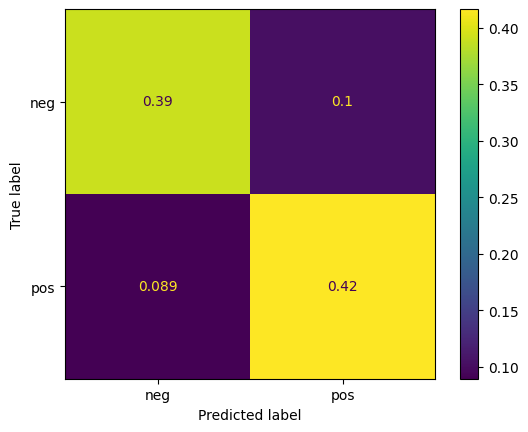

In [39]:
ConfusionMatrixDisplay.from_estimator(model_svm, X_test_bow, y_test, normalize='all')